### Visualization of an agent playing a Goal-seeking Gridworld task

In [ ]:
%matplotlib inline 
import numpy as np
import matplotlib.pyplot as plt
import os
from matplotlib import animation, rc
rc('animation', html='html5')
import random

In [ ]:
from gridworld import Environment
env =  Environment()
s = env.reset()

In [ ]:
# Define an agent
from myAgent import RandomAgent
agent = RandomAgent()
trajectory = []

In [ ]:
trajectory.append((env.AGENTS_X, env.AGENTS_Y))
steps = 100 # number of steps 
for j in range(steps):
    selected_action = agent.getAction(env)
    s, reward, terminal, agentX, agentY = env.step(selected_action)
    trajectory.append((agentX, agentY))
    if terminal:
        break

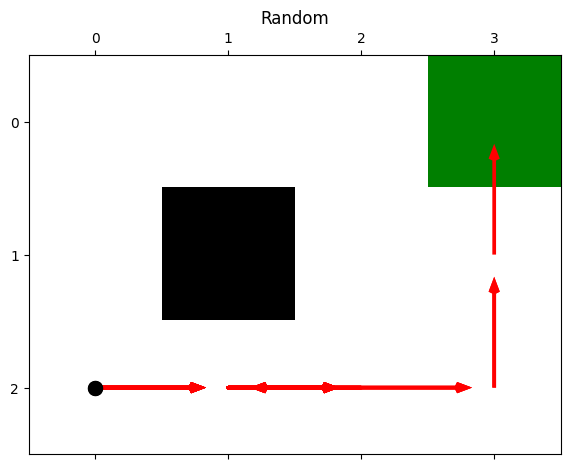

In [ ]:
fig, ax = env.showGrid()
ax.plot(trajectory[0][0], trajectory[0][1], 'ok', markersize=10) #draw the spawn location of the agent

xs, ys = zip(*trajectory)
ax.set_title(f"Random")
fig.tight_layout()
def update_quiver(i):
    x = np.array(xs)[:i]
    y = np.array(ys)[:i]
    ax.quiver(x[:-1], y[:-1], x[1:]-x[:-1], y[1:]-y[:-1], 
    scale_units='xy', angles='xy', scale=1.2, color='r', width=0.007, headwidth=3., headlength=4.)
anim = animation.FuncAnimation(fig, update_quiver, frames=len(trajectory)+1, interval=500, blit=False, repeat=True)
anim.save('plot_grid.gif', writer=animation.PillowWriter(fps=60))
plt.show()